<a href="https://colab.research.google.com/github/jakewalter/frontiers_geophysics/blob/main/earthquake_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
               network: AM
               station: REBE1
              location: 00
               channel: SHZ
             starttime: 2023-03-17T07:13:24.679000Z
               endtime: 2023-03-17T07:13:45.679000Z
         sampling_rate: 50.0
                 delta: 0.02
                  npts: 1051
                 calib: 1.0
_fdsnws_dataselect_url: https://fdsnws.raspberryshakedata.com/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3072})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2023, 3, 17, 7, 13, 45, 679000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2023, 3, 17, 7, 13, 24, 679000))']


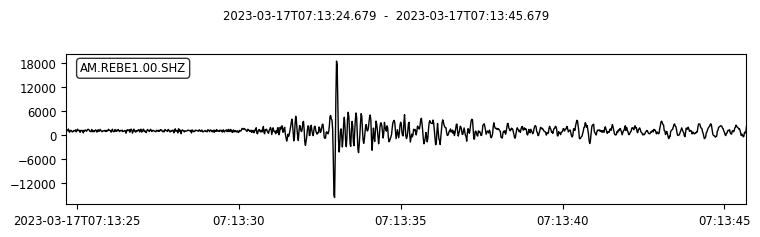

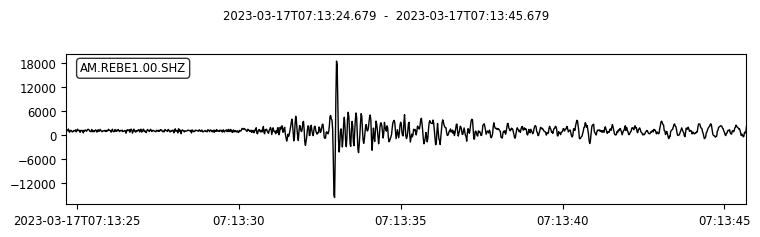

In [18]:
!pip install obspy

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

##### Find the time of the earthquake from https://wichita.ogs.ou.edu/staff/earthquake/events.html or https://earthquake.usgs.gov/
starttime = UTCDateTime("2023-03-17T07:13:24.67")
endtime = UTCDateTime("2023-03-17T07:13:45.67")

##### Choose a station https://stationview.raspberryshake.org/
sta1a = 'REBE1'
client = Client('RASPISHAKE')

##### Download waveforms
tr = client.get_waveforms(network='*', station=sta1a, location='*', channel='SHZ', starttime=starttime, endtime=endtime)
print(tr[0].stats)

##### Plot waveforms
tr.plot()


Now that we can plot a waveform. Notice there are no units. These are, by default, just digital counts. Let's try to get it in scientific units. To do this, you need to download the station metadata (the data that describes what is installed and where it is installed)

In [8]:
inv = client.get_stations(starttime=starttime, endtime=endtime,network="*", loc="*", channel='SHZ',station=sta1a,level="response")
print(inv[0][0])


Station REBE1 (Raspberry Shake Citizen Science Station)
	Station Code: REBE1
	Channel Count: None/None (Selected/Total)
	2022-07-05T20:57:17.510000Z - 
	Access: open 
	Latitude: 35.1892, Longitude: -97.4436, Elevation: 355.0 m
	Available Channels:
	  .00.SHZ        50.0 Hz  2022-07-05 to None



In [7]:
print(inv[0][0][0])


Channel 'SHZ', Location '00' 
	Time range: 2022-07-05T20:57:17.510000Z - --
	Latitude: 35.1892, Longitude: -97.4436, Elevation: 355.0 m, Local Depth: 0.0 m
	Azimuth: 0.00 degrees from north, clockwise
	Dip: -90.00 degrees down from horizontal
	Sampling Rate: 50.00 Hz
	Sensor (Description): Raspberry Shake (Velocity)
	Response information available


In [19]:

tr.remove_response(inventory=inv, pre_filt=[1, 2, 45, 50], output="DISP",water_level=60)
tr.plot()

#What are the y-axis units?



1 Trace(s) in Stream:
AM.REBE1.00.SHZ | 2023-03-17T07:13:24.679000Z - 2023-03-17T07:13:45.679000Z | 50.0 Hz, 1051 samples